# CMSE 202 Final Project - Social 1
## Terry White
## 11/19/2024
## Section 001
## Professor Haut
# How do Certain Factors Contribute to a Movie's Success and Sales Profit? 

### Getting to know the data

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

movies = pd.read_csv("movies_data.csv", encoding='ISO-8859-1')
movies.head()

Movie        Director  Running time          Actor 1  \
0          13 Hours     Michael Bay           144    Toby Stephens   
1         16 Blocks  Richard Donner           102     Bruce Willis   
2          17 Again     Burr Steers           102    Matthew Perry   
3              1982    Tommy Oliver            90  Bokeem Woodbine   
4  2 Fast 2 Furious  John Singleton           107      Paul Walker   

            Actor 2          Actor 3   Genre    Budget  Box Office  \
0  James Badge Dale  David Costabile  Action  50000000    69400000   
1       David Zayas       Sasha Roiz  Action  52000000    65000000   
2    Hunter Parrish    Thomas Lennon  Comedy  20000000   139000000   
3          Ruby Dee    Quinton Aaron   Drama   1000000     2000000   
4       Cole Hauser       Mo Gallini  Action  76000000   236000000   

   Actors Box Office %  Director Box Office %   Earnings  \
0                50.00                  69.23   19400000   
1                33.33                  50.00   13000000   
2                44.44                  25.00  119000000   
3                50.00                 100.00    1000000   
4                75.00                  42.85  160000000   

   Oscar and Golden Globes nominations  Oscar and Golden Globes awards  \
0                                    0                             0.0   
1                                    0                             0.0   
2                                    0                             0.0   
3                                    0                             0.0   
4                                    0                             0.0   

   Release year  IMDb score  
0          2016         7.4  
1          2006         6.6  
2          2009         6.4  
3          2013         7.1  
4          2003         5.9

### Looking for relationships

<Axes: title={'center': 'Movie Features'}>

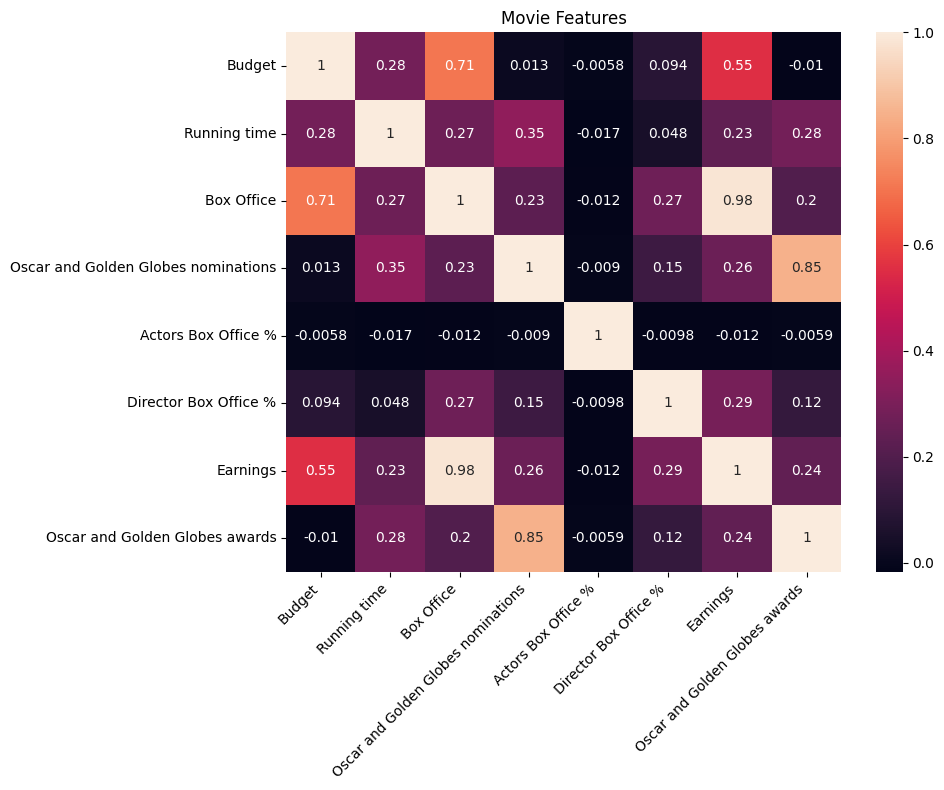

In [101]:
import seaborn as sb
plt.figure(figsize=(10, 8))
movies1 = movies[['Budget', 'Running time', 'Box Office',  
                   'Oscar and Golden Globes nominations', 'Actors Box Office %', 
                 'Director Box Office %', 'Earnings', 'Oscar and Golden Globes awards']]
heatmap = sb.heatmap(movies1.corr(), annot = True)
plt.xticks(rotation=45, ha='right')
plt.title("Movie Features")
plt.tight_layout()
heatmap

### Correlation between Budget and Box office visualized

Text(0.5, 1.0, 'Budget vs. Box Office (Correlation: 0.71)')

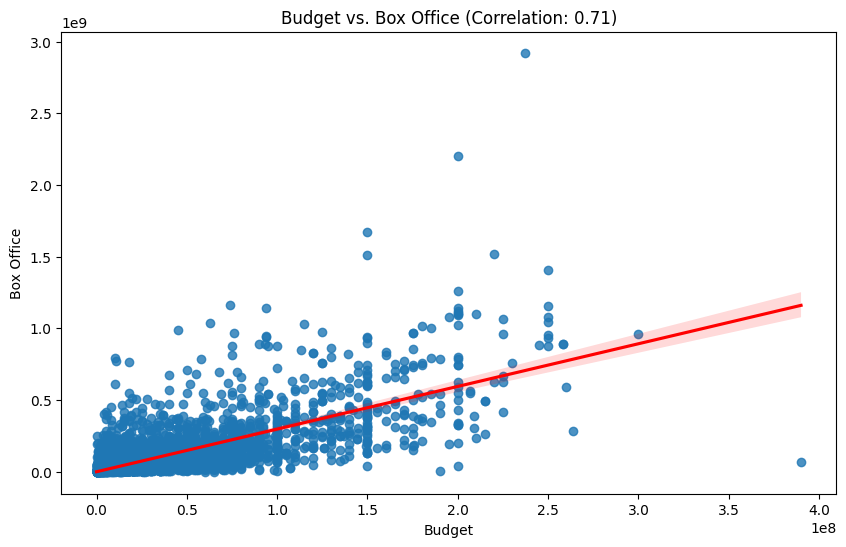

In [114]:
import seaborn as sns

correlation = movies[['Budget', 'Box Office']].corr().iloc[0, 1]
plt.figure(figsize=(10, 6))
sns.regplot(x='Budget', y='Box Office', data=movies, line_kws={"color": "red"})
plt.xlabel("Budget")
plt.ylabel("Box Office")
plt.title(f"Budget vs. Box Office (Correlation: {correlation:.2f})")

## Linear regression model predicting Box Office sales

In [169]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

features = movies[["Running time", "Budget", "Director Box Office %"]] # The features used in the linear regression to try and predict the label
features = sm.add_constant(features) # Necessary to add a constant, like adding an intercept
labels = movies["Box Office"] # Trying to predict
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, # Separates the data so
                                                                            train_size = 0.8, # some of it can be predicted
                                                                            random_state = 42) 
linear_model = sm.OLS(train_labels, train_features) # Applies a linear regression the training data
linear_model = linear_model.fit() # Fits the model to the data
linear_model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Box Office   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     1292.
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:38:02   Log-Likelihood:                -63693.
No. Observations:                3179   AIC:                         1.274e+05
Df Residuals:                    3175   BIC:                         1.274e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -1.02e+08   1.12e+07     -9.142      0.000   -1.24e+08   -8.01e+07
Running time           4.628e+05   9.95e+04      4.650      0.000    2.68e+05    6.58e+05
Budget                    2.8487      0.052     54.310      0.000       2.746       2.952
Director Box Office %  1.033e+06   6.11e+04     16.911      0.000    9.14e+05    1.15e+06
==============================================================================
Omnibus:                     3043.594   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           335753.092
Skew:                           4.248   Prob(JB):                         0.00
Kurtosis:                      52.624   Cond. No.                     2.92e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Predicted Box Office')

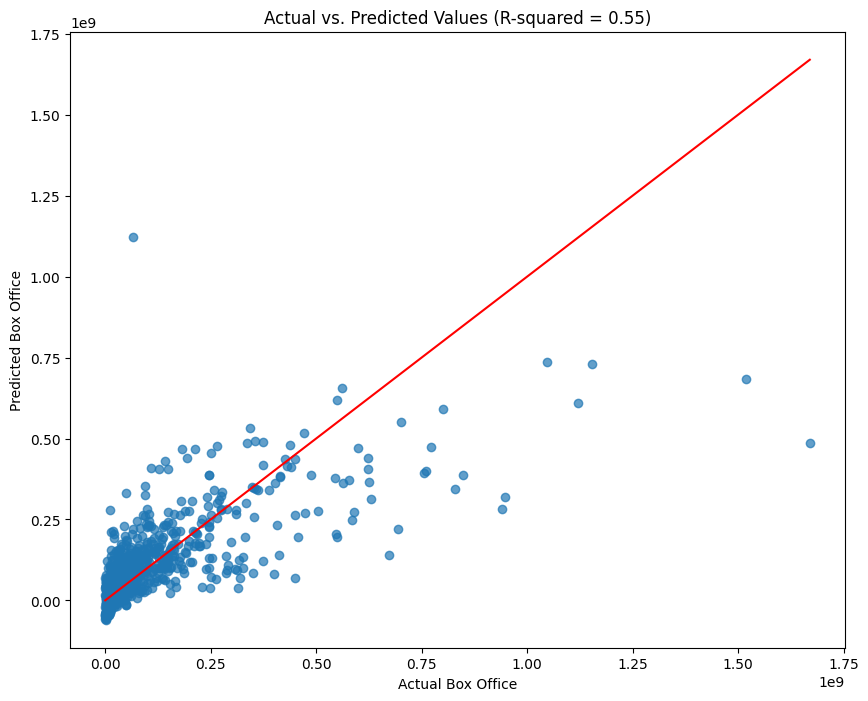

In [170]:
prediction = linear_model.predict(test_features) # predicts the Box Office test labels based on the test set of features
plt.figure(figsize=(10, 8)) 
plt.scatter(test_labels, prediction, alpha=0.7) # Scatter plot of the test Box Office data and the predicted Box Office data
plt.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], color="red") # Plots the predicted line 
plt.title(f"Actual vs. Predicted Values (R-squared = {linear_model.rsquared:.2f})")
plt.xlabel("Actual Box Office")
plt.ylabel("Predicted Box Office")

## Logistic Regression model classifying movies as successful (IMDb score > than 7) or unsuccessful

In [171]:
from sklearn.model_selection import train_test_split
features1 = movies[['Budget', 'Running time', 'Box Office',  
                   'Oscar and Golden Globes nominations', 'Actors Box Office %', 'Director Box Office %']]
labels1 = (movies['IMDb score'] >= 7).astype(int) # Assigns a 1 to scores greater than or equal to 7 and a 0 to the rest
train_features1, test_features1, train_labels1, test_labels1 = train_test_split(features1, labels1, # Separates data into train
                                                                            train_size = 0.8,       # and test data
                                                                            random_state = 42)
logit_model = sm.Logit(train_labels1, sm.add_constant(train_features1)).fit() # Applies a Logistic Regression model to classify
logit_model.summary()                                                         # the train scores based on the features data

Optimization terminated successfully.
         Current function value: 0.499723
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             IMDb score   No. Observations:                 3179
Model:                          Logit   Df Residuals:                     3172
Method:                           MLE   Df Model:                            6
Date:                Tue, 19 Nov 2024   Pseudo R-squ.:                  0.2235
Time:                        21:38:16   Log-Likelihood:                -1588.6
converged:                       True   LL-Null:                       -2045.8
Covariance Type:            nonrobust   LLR p-value:                2.944e-194
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.5244      0.275    -12.799      0.000      -4.064      -2.985
Budget                               -1.45e-08   1.85e-09     -7.822      0.000   -1.81e-08   -1.09e-08
Running time                            0.0211      0.002      8.697      0.000       0.016       0.026
Box Office                           2.559e-09   4.57e-10      5.605      0.000    1.66e-09    3.45e-09
Oscar and Golden Globes nominations     0.5198      0.037     14.115      0.000       0.448       0.592
Actors Box Office %                     0.0055      0.002      3.074      0.002       0.002       0.009
Director Box Office %                   0.0001      0.002      0.094      0.925      -0.003       0.003
=======================================================================================================
"""

In [172]:
predictions = logit_model.predict(sm.add_constant(test_features1)) # predicts the probabilities of test scores based on train features data
predictions = (predictions > 0.5).astype(int) # Logistic curve between 0 and 1 so assign probabilities to binary classifications
accuracy = (predictions == test_labels1).mean() # Find the average of correct predictions
print(f"Percentage of correct predictions: {accuracy * 100:.2f}%")

Percentage of correct predictions: 73.58%
